### Kaggle 예제(병든 잎 분류 모델)

### 데이터 불러오기

In [4]:
import pandas as pd

# 데이터 경로
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sub = pd.read_csv("./data/sample_submission.csv")

train.shape, test.shape

# train_data의 경우 image_id에 확장자가 미포함된 훈련이미지 데이터의 파일 명이 들어있다. 실제 이미지의 경우 images 디렉터리에 있다.
# 나머지 4개의 컬럼의 경우 각 상태를 원핫 인코딩 상태로 나타냈다. [0, 0, 0, 1]의 경우 scab에 해당하는 컬럼에 1이 있기에, 붉은 곰팡이 병에 걸렸다는 의미이다.
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
# 테스트 데이터의 경우 타겟값이 없으므로 이미지 데이터 파일 명인 image_id값만 존재한다.
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [6]:
# 제출 예제 데이터의 경우 각 확률을 임시로 25%로 할당된 모습을 볼 수 있다.
sub.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


### 데이터 시각화

([<matplotlib.patches.Wedge at 0x26029ad0220>,
 [Text(0.6921787180836257, 0.8549202431993926, 'healthy'),
  Text(-0.3942932497177081, 1.0269044908008969, 'multiple_diseases'),
  Text(-1.0996317038245758, -0.028462535794632142, 'rust'),
  Text(0.5744651016901711, -0.9380777403499678, 'scab')],
 [Text(0.377552028045614, 0.4663201326542141, '28.3%'),
  Text(-0.21506904530056806, 0.5601297222550347, '5.0%'),
  Text(-0.5997991111770412, -0.015525019524344801, '34.2%'),
  Text(0.31334460092191146, -0.5116787674636187, '32.5%')])

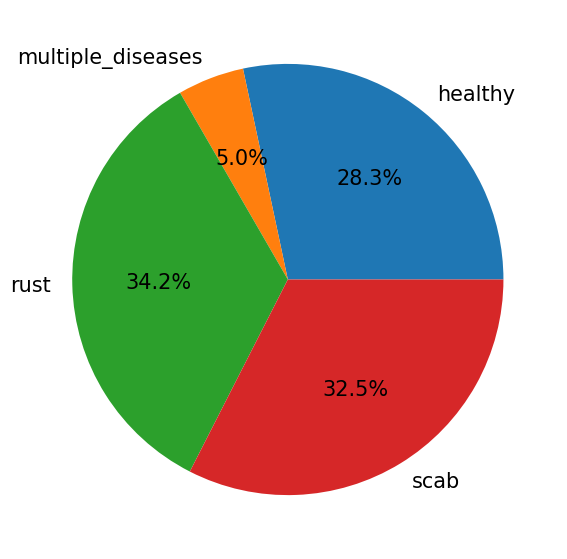

In [7]:
# 타겟값 분포 확인하기
healthy = train.loc[train['healthy'] == 1]
multiple_diseases = train.loc[train['multiple_diseases'] == 1]
rust = train.loc[train['rust'] == 1]
scab = train.loc[train['scab'] == 1]

# 각 병명에 해당하는 변수를 각각 만들었다. 이러한 내용을 기반으로 파이차트를 그린다.
import matplotlib as mlp
from matplotlib import pyplot as plt

mlp.rc('font', size=15)
plt.figure(figsize=(7, 7))
label = ['healthy', 'multiple_diseases', 'rust', 'scab']
plt.pie([len(healthy), len(multiple_diseases), len(rust), len(scab)], labels=label, autopct="%.1f%%")

# 데이터 분포 수를 살펴보면 rust > scab > healthy > mulitple diseases 순으로 많다. 
# 눈여겨 보아야 할 점은, mulitple diseases의 경우 타 병명들과 비율 차이가 심하기 때문에 훈련, 검증 데이터로 나눌 때 타겟값 비율에 맞게 나누는 것이 좋다.

### Images 파일 살펴보기

In [11]:
import matplotlib.gridspec as gridspec
import cv2

def show_img(img_ids, rows=2, cols=3):
    assert len(img_ids) <= rows*cols # 이미지가 행/열 개수보다 많으면 오류 발생(가정 설정문)
    
    plt.figure(figsize=(15, 8))
    grid = gridspec.GridSpec(rows, cols)
    
    for idx, image_id in enumerate(img_ids):
        img_path = f"./data/images/{image_id}.jpg"
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

# 2행 3열로 6개의 이미지를 출력하는 함수를 만들었다.

In [9]:
# 각 타겟별로 image_id를 마지막 6개를 가져와서 출력해보자.
num_of_imgs = 6
last_healthy_img_ids = healthy['image_id'][-num_of_imgs:]
last_multiple_diseases_img_ids = multiple_diseases['image_id'][-num_of_imgs:]
last_rust_img_ids = rust['image_id'][-num_of_imgs:]
last_scab_img_ids = scab['image_id'][-num_of_imgs:]

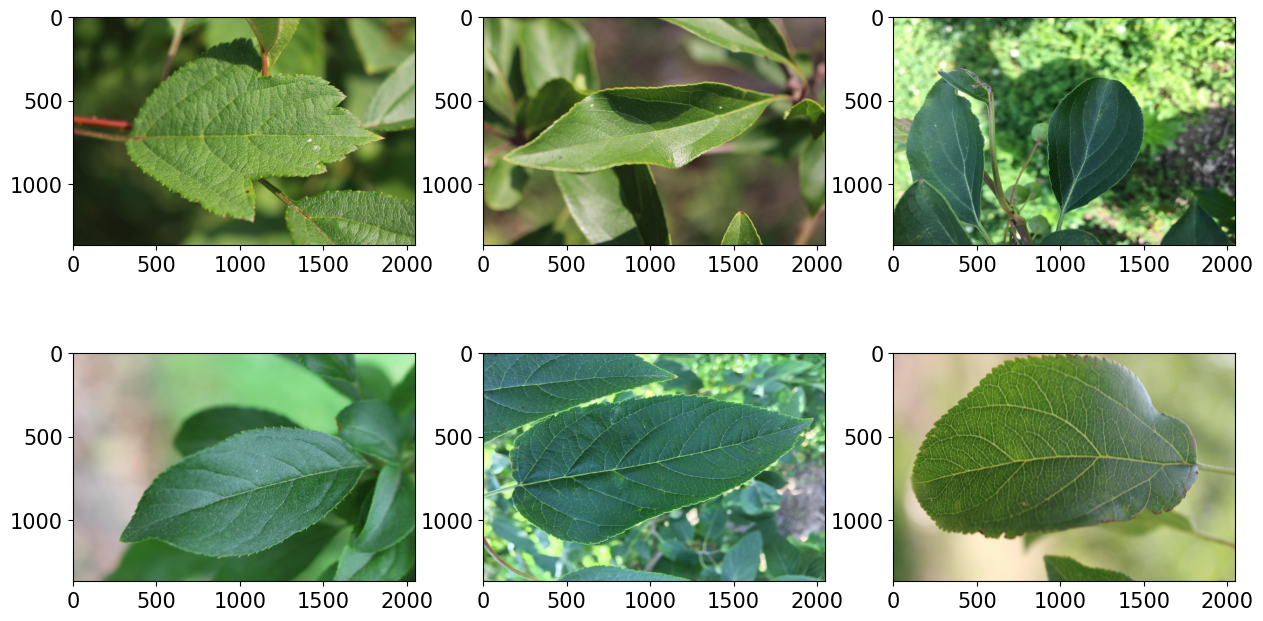

In [12]:
show_img(last_healthy_img_ids)

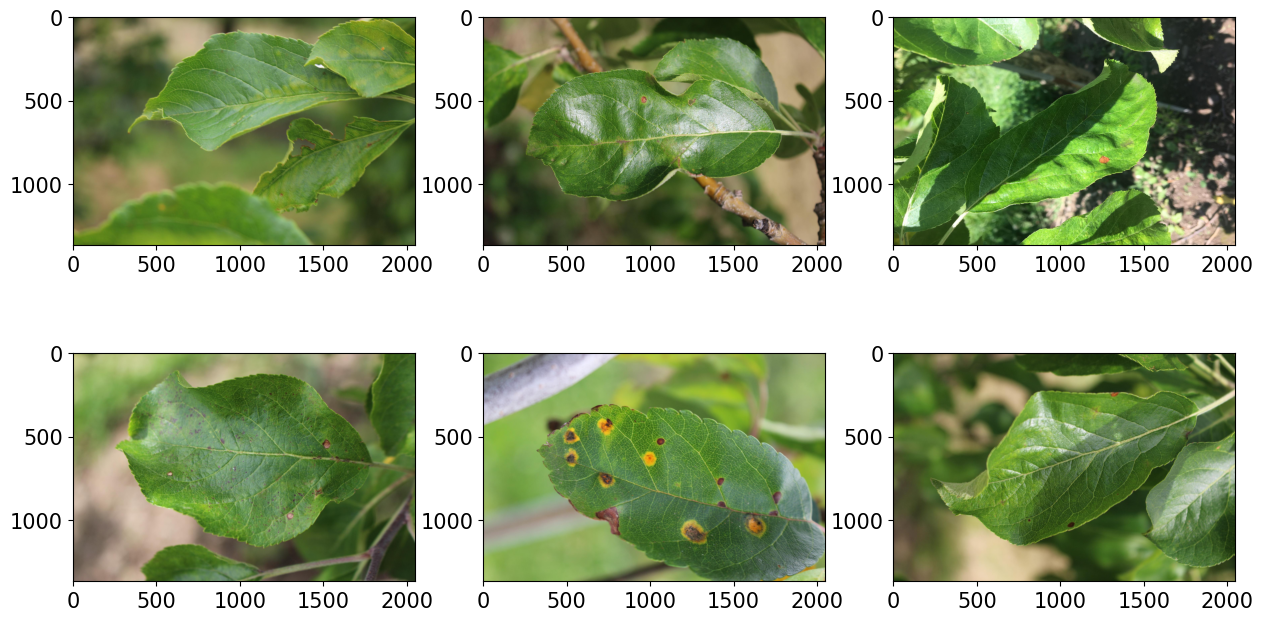

In [13]:
show_img(last_multiple_diseases_img_ids)